In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

from cur import *
from neuropacks import NHP
from pyuoi.decomposition import UoI_CUR, CUR

%matplotlib inline

In [2]:
monkeys = [
    'indy_20160407_02',
    'indy_20160411_01',
    'indy_20160411_02',
    'indy_20160418_01',
    'indy_20160419_01',
    'indy_20160420_01',
    'indy_20160426_01',
    'indy_20160622_01'
]

In [3]:
n_columns_cur = []
n_columns_uoi = []
reconstruction_cur = []
reconstruction_uoi = []

In [4]:
for monkey in monkeys:
    print(monkey)
    data_path = '/Users/psachdeva/data/NHP/' + monkey + '.mat'
    cur_results, uoi_results = compare_UoI_CUR_reconstruction_NHP(
        data_path=data_path, bin_width=0.25, region='M1'
    )
    
    n_columns_cur.append(cur_results[0])
    reconstruction_cur.append(cur_results[1])
    n_columns_uoi.append(uoi_results[0])
    reconstruction_uoi.append(uoi_results[1])

indy_20160407_02
indy_20160411_01
indy_20160411_02
indy_20160418_01
indy_20160419_01
indy_20160420_01
indy_20160426_01
indy_20160622_01


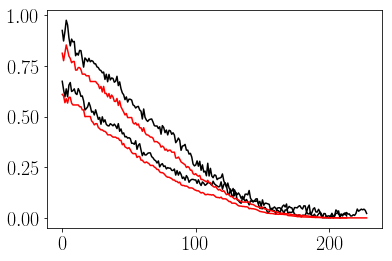

In [15]:
plt.plot(reconstruction_cur[7], color='k')
plt.plot(reconstruction_uoi[7], color='r')
plt.plot(reconstruction_cur[6], color='k')
plt.plot(reconstruction_uoi[6], color='r')

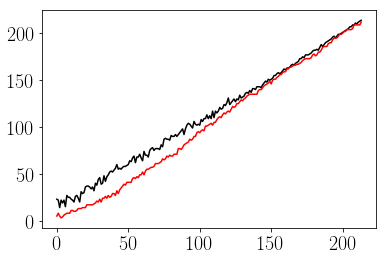

In [24]:
plt.plot(n_columns_cur[6], color='k')
plt.plot(n_columns_uoi[6], color='r')

In [25]:
f = h5py.File('/Users/psachdeva/fits/uoineuro/cur/cur.h5', 'w')
for idx, monkey in enumerate(monkeys):
    group = f.create_group(monkey)
    group['reconstruction_uoi'] = reconstruction_uoi[idx]
    group['n_columns_uoi'] = n_columns_uoi[idx]
    group['reconstruction_cur'] = reconstruction_cur[idx]
    group['n_columns_cur'] = n_columns_cur[idx]
    
f.close()